 # VISUALIZACIÓN
 

## IMPORTACIONES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re

In [2]:
!pwd

/Users/jaimecabanyes/Desktop/IRON_HACK/Trabajos IH/W3


In [3]:
ascensos_final = pd.read_csv("Data/ascensos_everest_final.csv")

## PEQUEÑOS DATAFRAMES DEL DATAFRAME ORIGINAL

In [4]:
df_citizenship_común = ascensos_final[ascensos_final['Citizenship'].map(ascensos_final['Citizenship'].value_counts()) > 75]
#Dataframe de las nacionalidades mas frequentes

In [5]:
df_citizenship_común1 = ascensos_final[ascensos_final["Citizenship"] != "Nepal"]

In [6]:
df_no_may = ascensos_final[ascensos_final["Month"] != "May"]
#Dataframe excluyendo Mayo

In [7]:
df_no_oxígeno = ascensos_final[ascensos_final["Oxy"] != "Yes"]
#Dataframe excluyendo el uso de oxígeno

In [8]:
df_Time_común = ascensos_final[ascensos_final['Time'].map(ascensos_final['Time'].value_counts()) > 25]
#Dataframe incluyendo las horas de llegada mas comunes

In [9]:
df_Time_común1 = df_Time_común.sort_values(by="Time", ascending=True)

## DISPLAY DE LOS  GRÀFICOS

In [10]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (14.,8.)})
sns.set_style("whitegrid")

## DISTRIBUCIONES 

In [11]:
ascensos_final.head(1)

,Unnamed: 0,Peak,Name,Citizenship,Sex,Age,Oxy,Dth,Host,Year,Season,Month,Day,Time
0,0,EVER,Tenzing Norgay,India,M,39.0,Yes,No,Nepal,1953,Spr,May,29,11:30


### DISTRIBUCIÓN DE ALPINISTAS POR EDAD

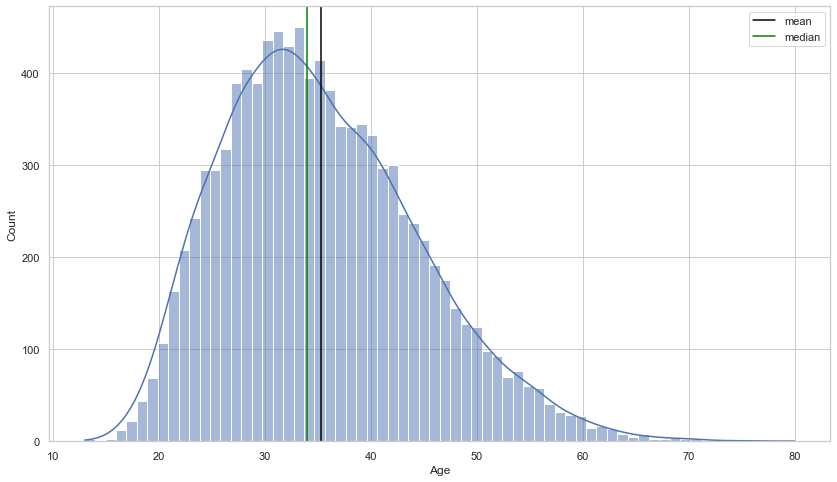

In [12]:
graf = sns.histplot(x=ascensos_final.Age, kde=True, bins = 68)
graf.axvline(x=ascensos_final.Age.dropna().mean(), c="black", label="mean")
graf.axvline(x=ascensos_final.Age.dropna().median(), c="green", label="median")
plt.legend()

### USO DE OXÍGENO

In [13]:
Datos = ascensos_final["Oxy"].value_counts()

<AxesSubplot:ylabel='Oxy'>

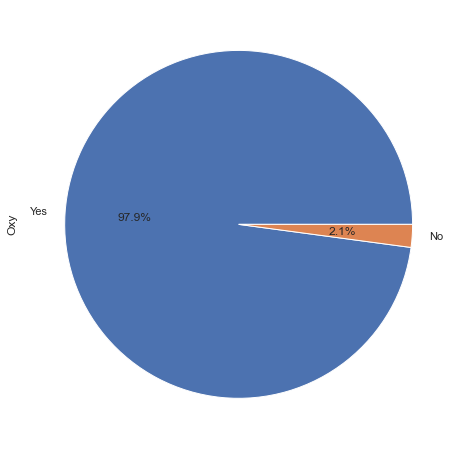

In [14]:
Datos.plot.pie(autopct="%.1f%%")


<AxesSubplot:xlabel='Year', ylabel='Count'>

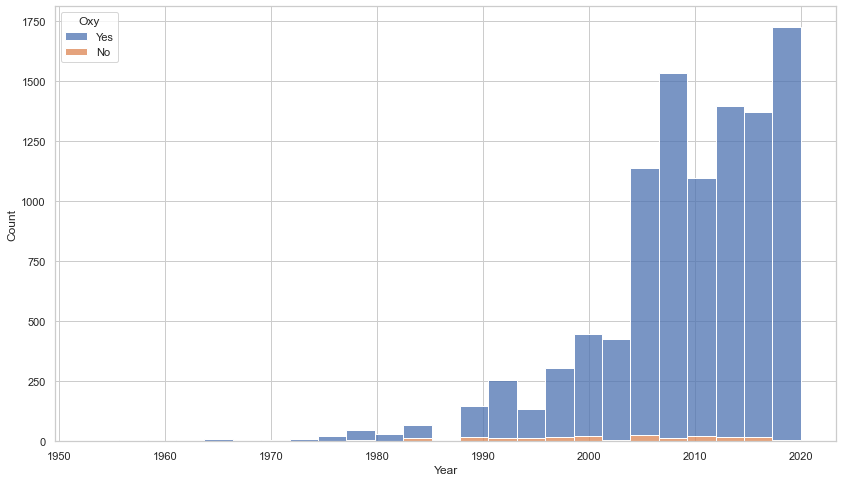

In [15]:
sns.histplot(data=ascensos_final, x="Year", hue="Oxy", multiple="stack", bins=25)

<AxesSubplot:xlabel='Year', ylabel='Count'>

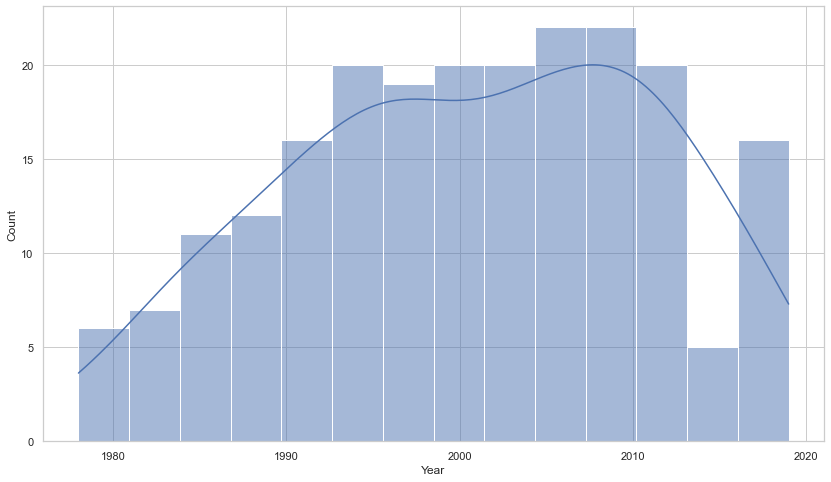

In [16]:
sns.histplot(data=df_no_oxígeno, x="Year", bins=14, kde=True)

### COMPARACIÓN EDAD CON MUERTE/GÉNERO

<AxesSubplot:xlabel='Sex', ylabel='Age'>

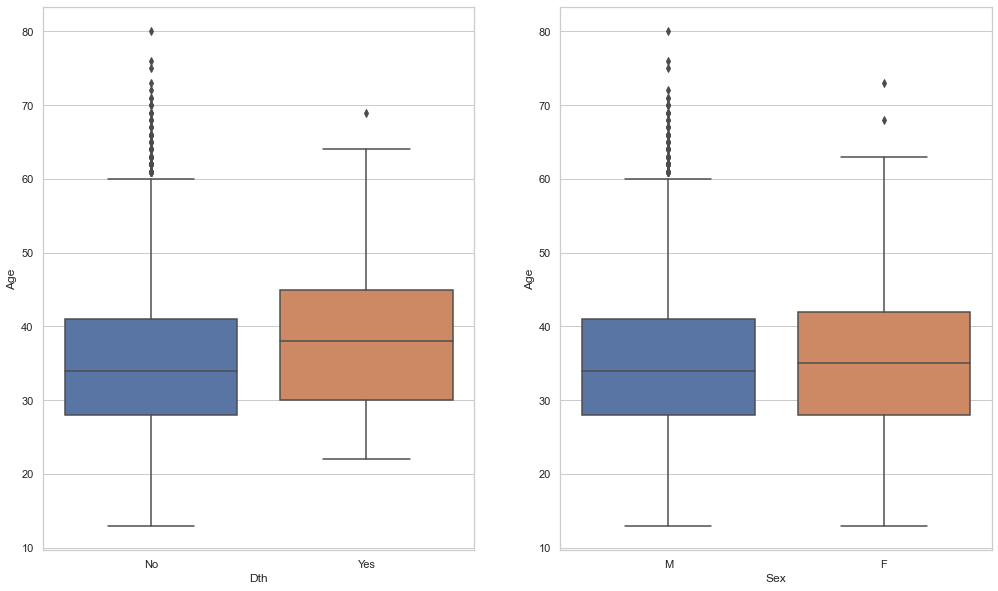

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,10))
sns.boxplot(x="Dth", y="Age", data=ascensos_final, ax=ax[0])
sns.boxplot(x="Sex", y="Age", data=ascensos_final, ax=ax[1])

### DDISTRIBUCIÓN POR MES

In [18]:
Datos1 = ascensos_final["Month"].value_counts()

In [19]:
Datos1

May    9673
Oct     241
Jun     152
Apr      48
Sep      46
Dec      13
Aug       9
Feb       2
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

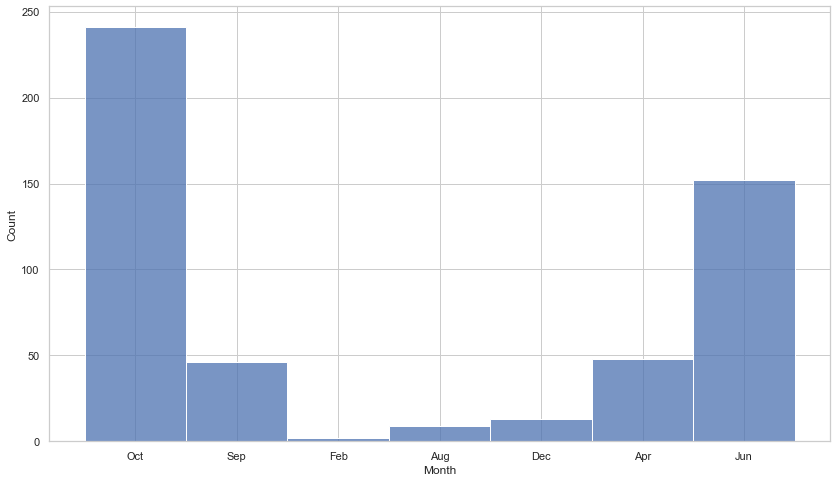

In [20]:
sns.histplot(x=df_no_may.Month)

# HORA PARA HACER CIMA

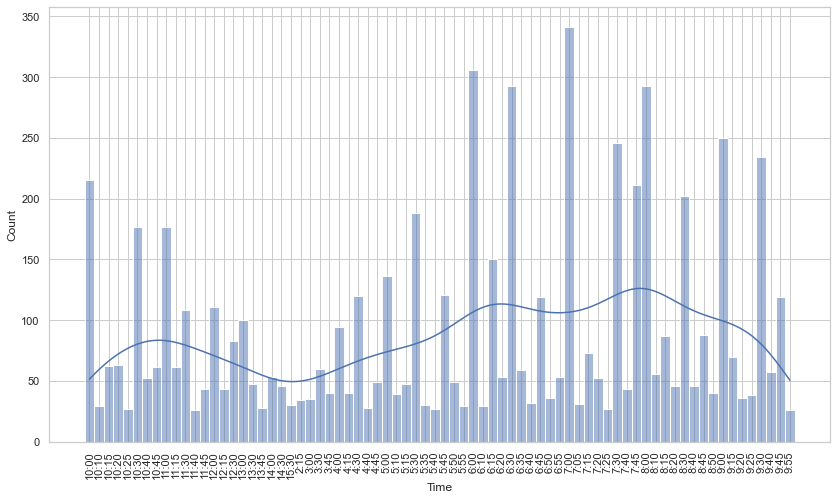

In [21]:
sns.histplot(data=df_Time_común1, x="Time", multiple="stack", kde=True)
plt.xticks(rotation=90);

# ALPINISTAS POR PAÍS DE ORIGEN

<AxesSubplot:xlabel='Citizenship', ylabel='count'>

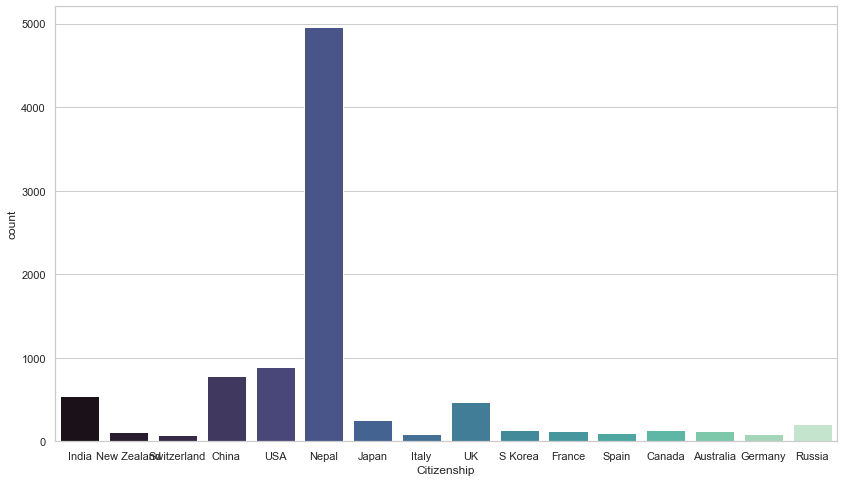

In [22]:
sns.countplot(x=df_citizenship_común.Citizenship, palette="mako")

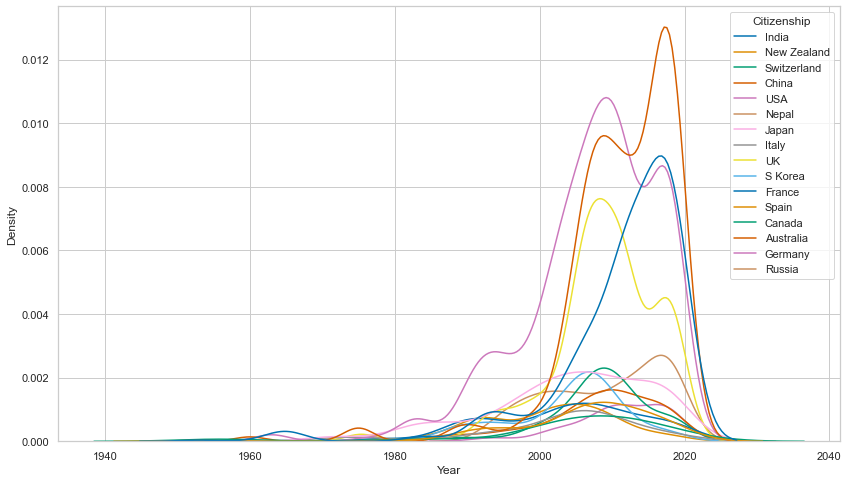

In [23]:
sns.kdeplot(x=df_citizenship_común1.Year, hue=df_citizenship_común.Citizenship, warn_singular=False, palette="colorblind");
# Excluyendo Nepal (Fuera de rango)